#  Detection of IoT Cyberattacks Smart City Using Machine Learning 

In [79]:
#import Libraries
import streamlit as st
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, precision_score, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder

# Load Dataset

In [80]:
# Load dataset
df1 = pd.read_csv("C:\\Users\\CHIRAG AHIR\\OneDrive\\Documents\\DS 670 Capstone NEW DATASET UNSW\\UNSW_NB15_train.csv")

# showcasing the data header
df1.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [81]:
df2 = pd.read_csv("C:\\Users\\CHIRAG AHIR\\OneDrive\\Documents\\DS 670 Capstone NEW DATASET UNSW\\UNSW_NB15_test.csv")

df2.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [82]:
df = pd.concat([df1, df2])

#Showcasing Data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257673 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  sin

In [83]:
df.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,2.576730e+05,2.576730e+05,257673.000000,257673.000000,2.576730e+05,...,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000
mean,72811.823858,1.246715,19.777144,18.514703,8.572952e+03,1.438729e+04,9.125391e+04,180.000931,84.754957,7.060869e+07,...,5.238271,4.032677,8.322964,0.012819,0.012850,0.132005,6.800045,9.121049,0.014274,0.639077
std,48929.917641,5.974305,135.947152,111.985965,1.737739e+05,1.461993e+05,1.603446e+05,102.488268,112.762131,1.857313e+08,...,8.160822,5.831515,11.120754,0.116091,0.116421,0.681854,8.396266,10.874752,0.118618,0.480269
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,32210.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.078928e+01,62.000000,0.000000,1.231800e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,64419.000000,0.004285,4.000000,2.000000,5.280000e+02,1.780000e+02,2.955665e+03,254.000000,29.000000,7.439423e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,110923.000000,0.685777,12.000000,10.000000,1.362000e+03,1.064000e+03,1.250000e+05,254.000000,252.000000,8.000000e+07,...,4.000000,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000,1.000000
max,175341.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,...,59.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [84]:
df.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

### drop null values

In [85]:
df = df.dropna()

### remove duplicates

In [86]:
print(df.duplicated().sum())

0


# EDA

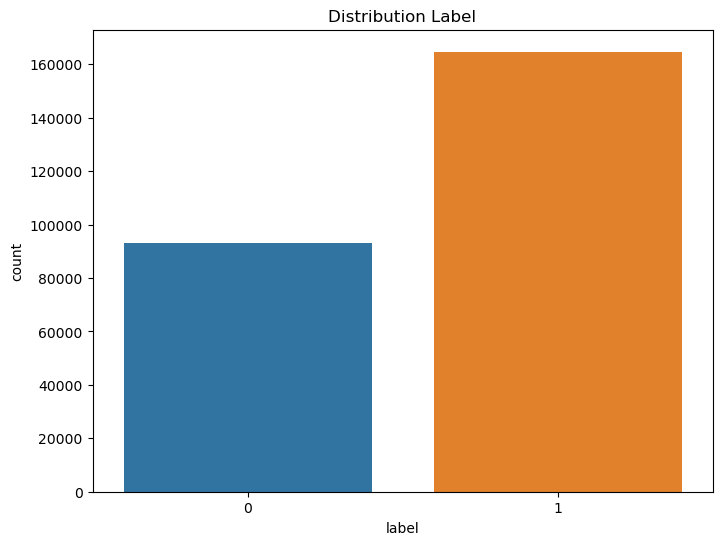

1    0.639077
0    0.360923
Name: label, dtype: float64


In [87]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution Label')
plt.show()

# Display Chart
print(df['label'].value_counts(normalize=True))

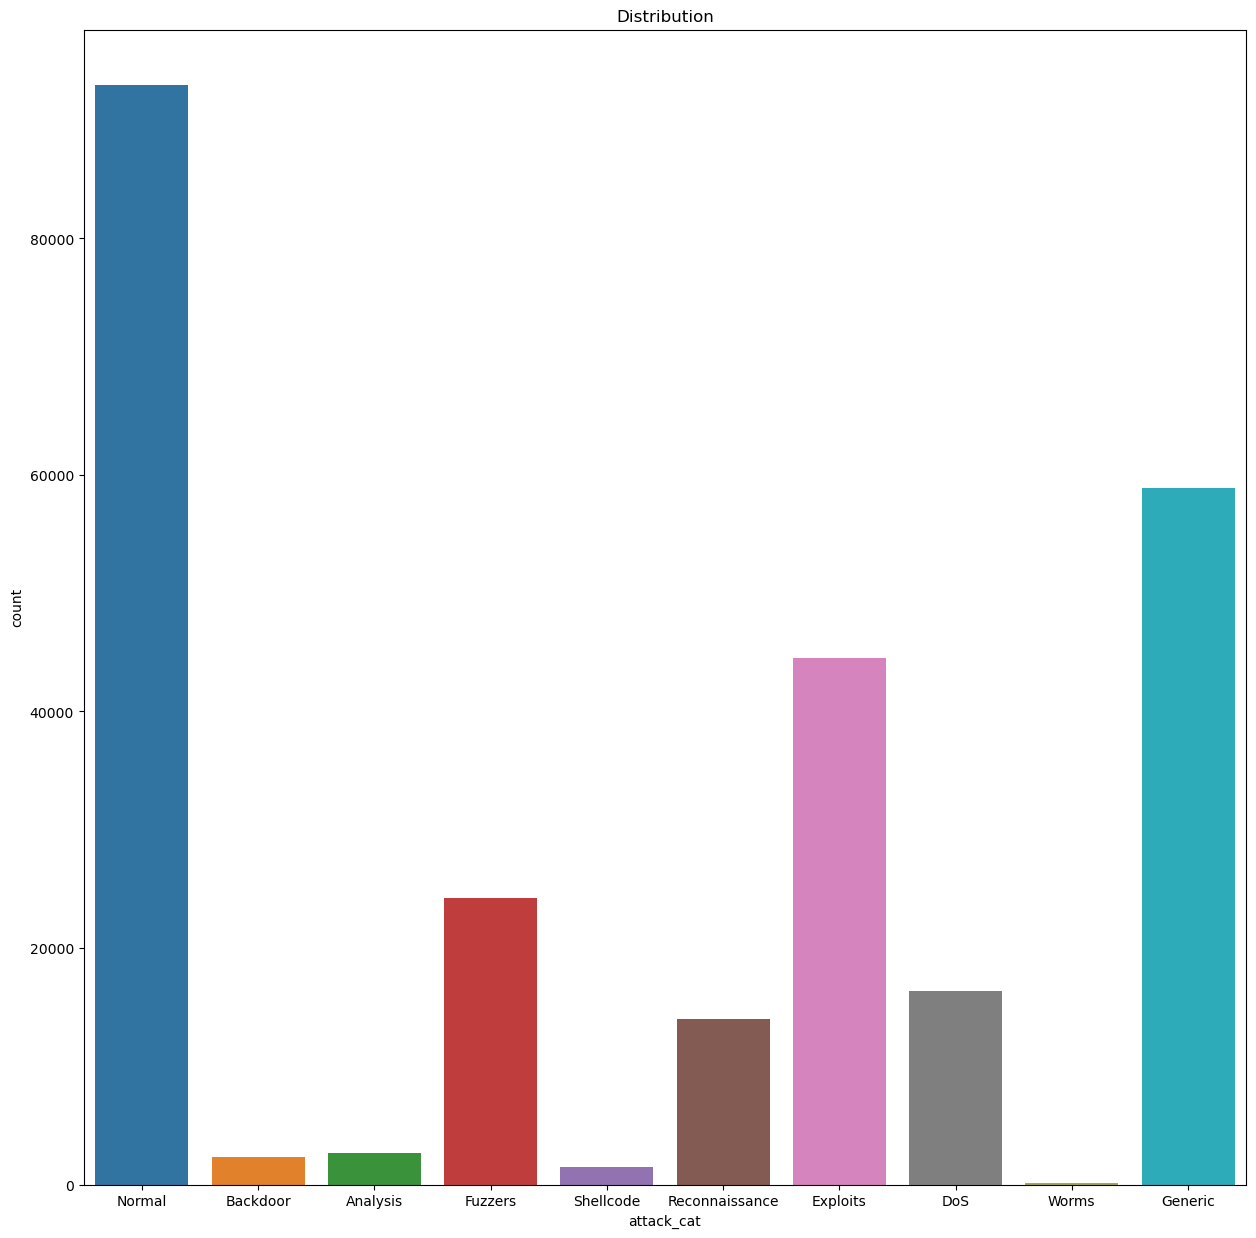

Normal            0.360923
Generic           0.228472
Exploits          0.172797
Fuzzers           0.094096
DoS               0.063464
Reconnaissance    0.054282
Analysis          0.010389
Backdoor          0.009039
Shellcode         0.005864
Worms             0.000675
Name: attack_cat, dtype: float64


In [88]:
plt.figure(figsize=(15, 15))
sns.countplot(x='attack_cat', data=df)
plt.title('Distribution')
plt.show()

# Display normalized value counts
print(df['attack_cat'].value_counts(normalize=True))

In [89]:
attack_cat = ['Normal','Generic', 'Exploits', 'Fuzzers', 'DoS', 'Reconnaissance', 'Analysis', 'Backdoor', 'Shellcode','Worms']

In [90]:
#defining col list
cols = ['proto','state','service']
cols

['proto', 'state', 'service']

In [91]:
#encoding for the categorical features
df = pd.get_dummies(df, columns = cols, drop_first=True)

In [92]:
# Separate features (X) and target (y)
X = df.drop(columns='attack_cat')
y = df['attack_cat']

In [93]:
# List of numerical columns
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()

In [94]:
# Select only numerical features
X_num = X[numerical_cols]
print(X_num.loc[:,:].max().to_string())

id                   1.753410e+05
dur                  5.999999e+01
spkts                1.064600e+04
dpkts                1.101800e+04
sbytes               1.435577e+07
dbytes               1.465753e+07
rate                 1.000000e+06
sttl                 2.550000e+02
dttl                 2.540000e+02
sload                5.988000e+09
dload                2.242273e+07
sloss                5.319000e+03
dloss                5.507000e+03
sinpkt               8.437150e+04
dinpkt               5.773924e+04
sjit                 1.483831e+06
djit                 4.631992e+05
swin                 2.550000e+02
stcpb                4.294959e+09
dtcpb                4.294882e+09
dwin                 2.550000e+02
tcprtt               3.821465e+00
synack               3.226788e+00
ackdat               2.928778e+00
smean                1.504000e+03
dmean                1.500000e+03
trans_depth          1.720000e+02
response_body_len    6.558056e+06
ct_srv_src           6.300000e+01
ct_state_ttl  

In [95]:
# Split the dataset into training and testing sets with 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=2)

In [96]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [97]:
print("Training set:", len(X_train))
print("Testing set:", len(X_test))

Training set: 206138
Testing set: 51535


In [98]:
#Implementing Random Forest Model  

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Classification Report
classification_report_rf = classification_report(y_test, y_pred_rf, target_names=attack_cat)

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Results:")
print("\nClassification Report:\n", classification_report_rf)
print("\nConfusion Matrix:\n", conf_matrix_rf)

joblib.dump(rf_model, 'C:\\Users\\CHIRAG AHIR\\OneDrive\\Documents\\DS 670 Capstone NEW DATASET UNSW\\rf_model.sav')

Random Forest Results:

Classification Report:
                 precision    recall  f1-score   support

        Normal       0.23      0.20      0.21       540
       Generic       0.12      0.12      0.12       472
      Exploits       0.39      0.36      0.37      3232
       Fuzzers       0.74      0.79      0.76      8923
           DoS       0.88      0.89      0.89      4957
Reconnaissance       1.00      0.98      0.99     11860
      Analysis       1.00      1.00      1.00     18431
      Backdoor       0.80      0.78      0.79      2783
     Shellcode       0.68      0.65      0.66       301
         Worms       0.44      0.11      0.18        36

      accuracy                           0.88     51535
     macro avg       0.63      0.59      0.60     51535
  weighted avg       0.88      0.88      0.88     51535


Confusion Matrix:
 [[  108    94   166   128    39     0     0     5     0     0]
 [   69    55   101   159    16     2     0    68     2     0]
 [  130    97  1156

['C:\\Users\\CHIRAG AHIR\\OneDrive\\Documents\\DS 670 Capstone NEW DATASET UNSW\\rf_model.sav']

In [99]:
#Implementing Logistic Regression Model
lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Classification Report
classification_report_lr = classification_report(y_test, y_pred_lr, target_names=attack_cat)

# Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

print("Logistic Regression Results:")
print("\nClassification Report:\n", classification_report_lr)
print("\nConfusion Matrix:\n", conf_matrix_lr)

joblib.dump(lr_model, 'C:\\Users\\CHIRAG AHIR\\OneDrive\\Documents\\DS 670 Capstone NEW DATASET UNSW\\lr_model.sav')

C:\New folder\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Results:

Classification Report:
                 precision    recall  f1-score   support

        Normal       0.76      0.08      0.14       540
       Generic       0.75      0.01      0.01       472
      Exploits       0.35      0.02      0.04      3232
       Fuzzers       0.60      0.89      0.72      8923
           DoS       0.75      0.80      0.77      4957
Reconnaissance       0.99      0.97      0.98     11860
      Analysis       1.00      1.00      1.00     18431
      Backdoor       0.66      0.63      0.65      2783
     Shellcode       0.00      0.00      0.00       301
         Worms       0.00      0.00      0.00        36

      accuracy                           0.85     51535
     macro avg       0.59      0.44      0.43     51535
  weighted avg       0.83      0.85      0.82     51535


Confusion Matrix:
 [[   42     0     9   454    35     0     0     0     0     0]
 [    0     3     3   385    54     0     0    27     0     0]
 [    0     0

['C:\\Users\\CHIRAG AHIR\\OneDrive\\Documents\\DS 670 Capstone NEW DATASET UNSW\\lr_model.sav']

In [108]:
import numpy as np
print(X_test.shape)
nn=np.zeros((1,187))
n2=np.zeros((1,8))
n3=np.concatenate((nn,n2),axis=1)
n4=np.concatenate((n3,n3),axis=0)
print(n4.shape)

(51535, 195)
(2, 195)


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create Decision Tree model
dt_model = DecisionTreeClassifier()

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Classification Report
classification_report_dt = classification_report(y_test, y_pred_dt, target_names=attack_cat)

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Print Decision Tree results
print("Decision Tree Results:")
print("\nClassification Report:\n", classification_report_dt)
print("\nConfusion Matrix:\n", conf_matrix_dt)

Decision Tree Results:

Classification Report:
                 precision    recall  f1-score   support

        Normal       0.23      0.21      0.22       540
       Generic       0.15      0.16      0.16       472
      Exploits       0.38      0.40      0.39      3232
       Fuzzers       0.74      0.73      0.73      8923
           DoS       0.88      0.86      0.87      4957
Reconnaissance       0.98      0.98      0.98     11860
      Analysis       1.00      1.00      1.00     18431
      Backdoor       0.78      0.77      0.77      2783
     Shellcode       0.63      0.63      0.63       301
         Worms       0.46      0.33      0.39        36

      accuracy                           0.87     51535
     macro avg       0.62      0.61      0.61     51535
  weighted avg       0.87      0.87      0.87     51535


Confusion Matrix:
 [[  114    70   156   129    64     2     0     5     0     0]
 [   58    76   106   142    17     4     0    67     2     0]
 [  115   103  1308

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Create Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Classification Report
classification_report_nb = classification_report(y_test, y_pred_nb, target_names=attack_cat)

# Confusion Matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Print Naive Bayes results
print("Naive Bayes Results:")
print("\nClassification Report:\n", classification_report_nb)
print("\nConfusion Matrix:\n", conf_matrix_nb)


Naive Bayes Results:

Classification Report:
                 precision    recall  f1-score   support

        Normal       0.04      0.14      0.07       540
       Generic       0.03      0.12      0.05       472
      Exploits       0.29      0.01      0.01      3232
       Fuzzers       0.92      0.20      0.33      8923
           DoS       0.51      0.10      0.16      4957
Reconnaissance       0.77      0.97      0.86     11860
      Analysis       1.00      1.00      1.00     18431
      Backdoor       0.09      0.01      0.02      2783
     Shellcode       0.06      1.00      0.12       301
         Worms       0.00      0.81      0.01        36

      accuracy                           0.64     51535
     macro avg       0.37      0.44      0.26     51535
  weighted avg       0.77      0.64      0.63     51535


Confusion Matrix:
 [[   78   136     0     1    11   189     0     7     0   118]
 [  136    58     1     1    21   179     0    14    35    27]
 [  594   596    19  

In [25]:
!pip install streamlit